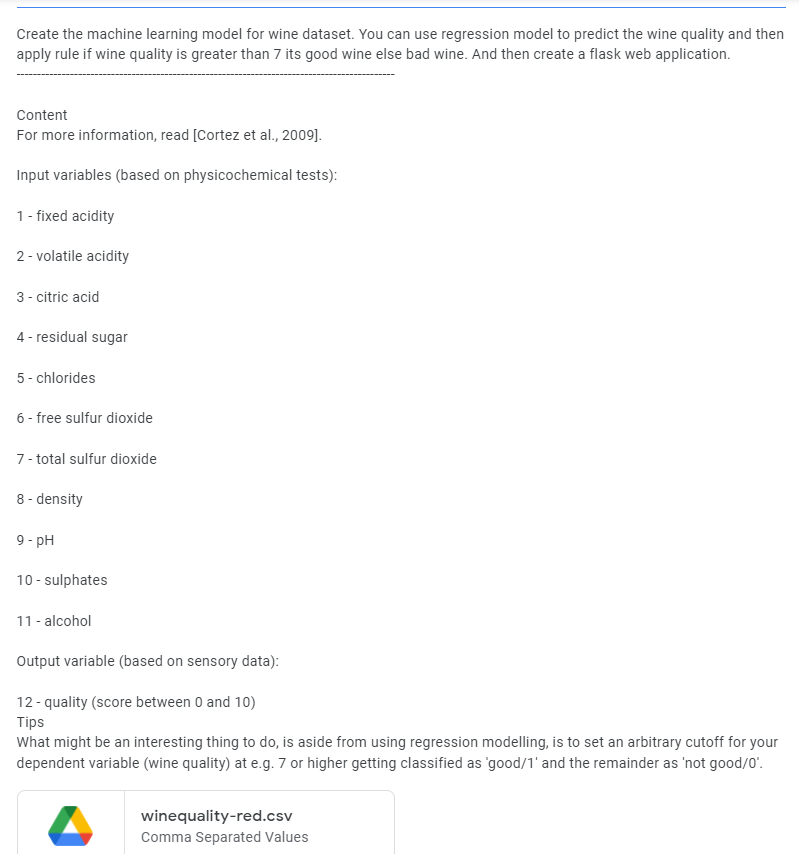

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.multiclass import OneVsRestClassifier

### Loading The Dataset

In [2]:
df=pd.read_csv(r"winequality-red - winequality-red.csv")

In [3]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
56,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,5
849,6.4,0.63,0.21,1.6,0.080,12.0,32.0,0.99689,3.58,0.66,9.8,5
1510,6.4,0.36,0.21,2.2,0.047,26.0,48.0,0.99661,3.47,0.77,9.7,6
549,9.0,0.53,0.49,1.9,0.171,6.0,25.0,0.99750,3.27,0.61,9.4,6
193,7.6,0.55,0.21,2.2,0.071,7.0,28.0,0.99640,3.28,0.55,9.7,5


# Exploratory Data Analysis

In [4]:
df.shape

(1599, 12)

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.duplicated().sum()

240

In [9]:
df=df.drop_duplicates()

In [10]:
#statastical info`
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

#### Detect outlier

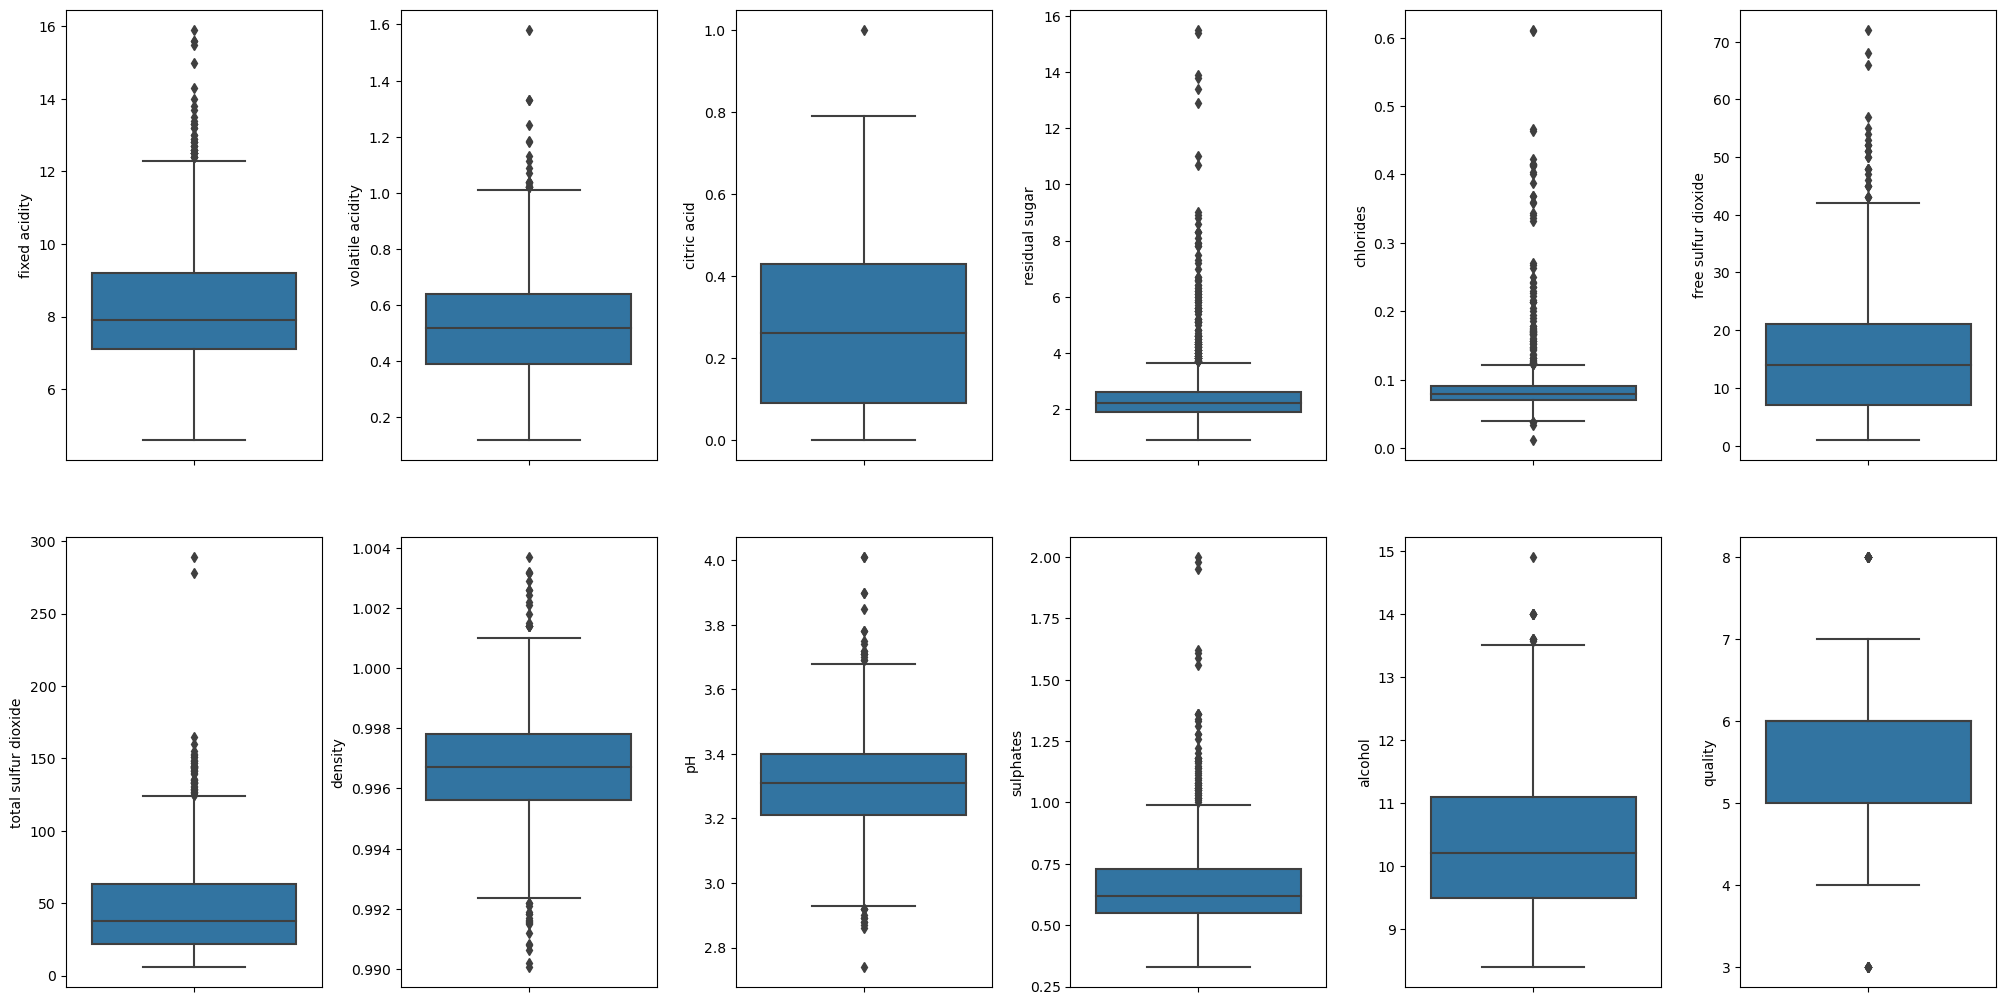

In [12]:
# create box plot
fig, ax = plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for i,j in df.items():
    sns.boxplot(y=i,data=df,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [13]:
lower_bound=df["volatile acidity"].mean()- 3*(df["volatile acidity"].std())
Upper_bound=df["volatile acidity"].mean()+ 3*(df["volatile acidity"].std())
df=df[(df["volatile acidity"]<Upper_bound) & (df["volatile acidity"]>lower_bound)]

lower_bound=df["citric acid"].mean()- 3*(df["citric acid"].std())
Upper_bound=df["citric acid"].mean()+ 3*(df["citric acid"].std())
df=df[(df["citric acid"]<Upper_bound) & (df["citric acid"]>lower_bound)]

lower_bound=df["residual sugar"].mean()- 3*(df["residual sugar"].std())
Upper_bound=df["residual sugar"].mean()+ 3*(df["residual sugar"].std())
df=df[(df["residual sugar"]<Upper_bound) & (df["residual sugar"]>lower_bound)]

lower_bound=df["chlorides"].mean()- 3*(df["chlorides"].std())
Upper_bound=df["chlorides"].mean()+ 3*(df["chlorides"].std())
df=df[(df["chlorides"]<Upper_bound) & (df["chlorides"]>lower_bound)]

lower_bound=df["free sulfur dioxide"].mean()- 3*(df["volatile acidity"].std())
Upper_bound=df["free sulfur dioxide"].mean()+ 3*(df["free sulfur dioxide"].std())
df=df[(df["free sulfur dioxide"]<Upper_bound) & (df["free sulfur dioxide"]>lower_bound)]

lower_bound=df["density"].mean()- 3*(df["density"].std())
Upper_bound=df["density"].mean()+ 3*(df["density"].std())
df=df[(df["density"]<Upper_bound) & (df["density"]>lower_bound)]

lower_bound=df["pH"].mean()- 3*(df["pH"].std())
Upper_bound=df["pH"].mean()+ 3*(df["pH"].std())
df=df[(df["pH"]<Upper_bound) & (df["pH"]>lower_bound)]

lower_bound=df["sulphates"].mean()- 3*(df["sulphates"].std())
Upper_bound=df["sulphates"].mean()+ 3*(df["sulphates"].std())
df=df[(df["sulphates"]<Upper_bound) & (df["sulphates"]>lower_bound)]

lower_bound=df["alcohol"].mean()- 3*(df["alcohol"].std())
Upper_bound=df["alcohol"].mean()+ 3*(df["alcohol"].std())
df=df[(df["alcohol"]<Upper_bound) & (df["alcohol"]>lower_bound)]

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.99430,3.58,0.52,9.9,5
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


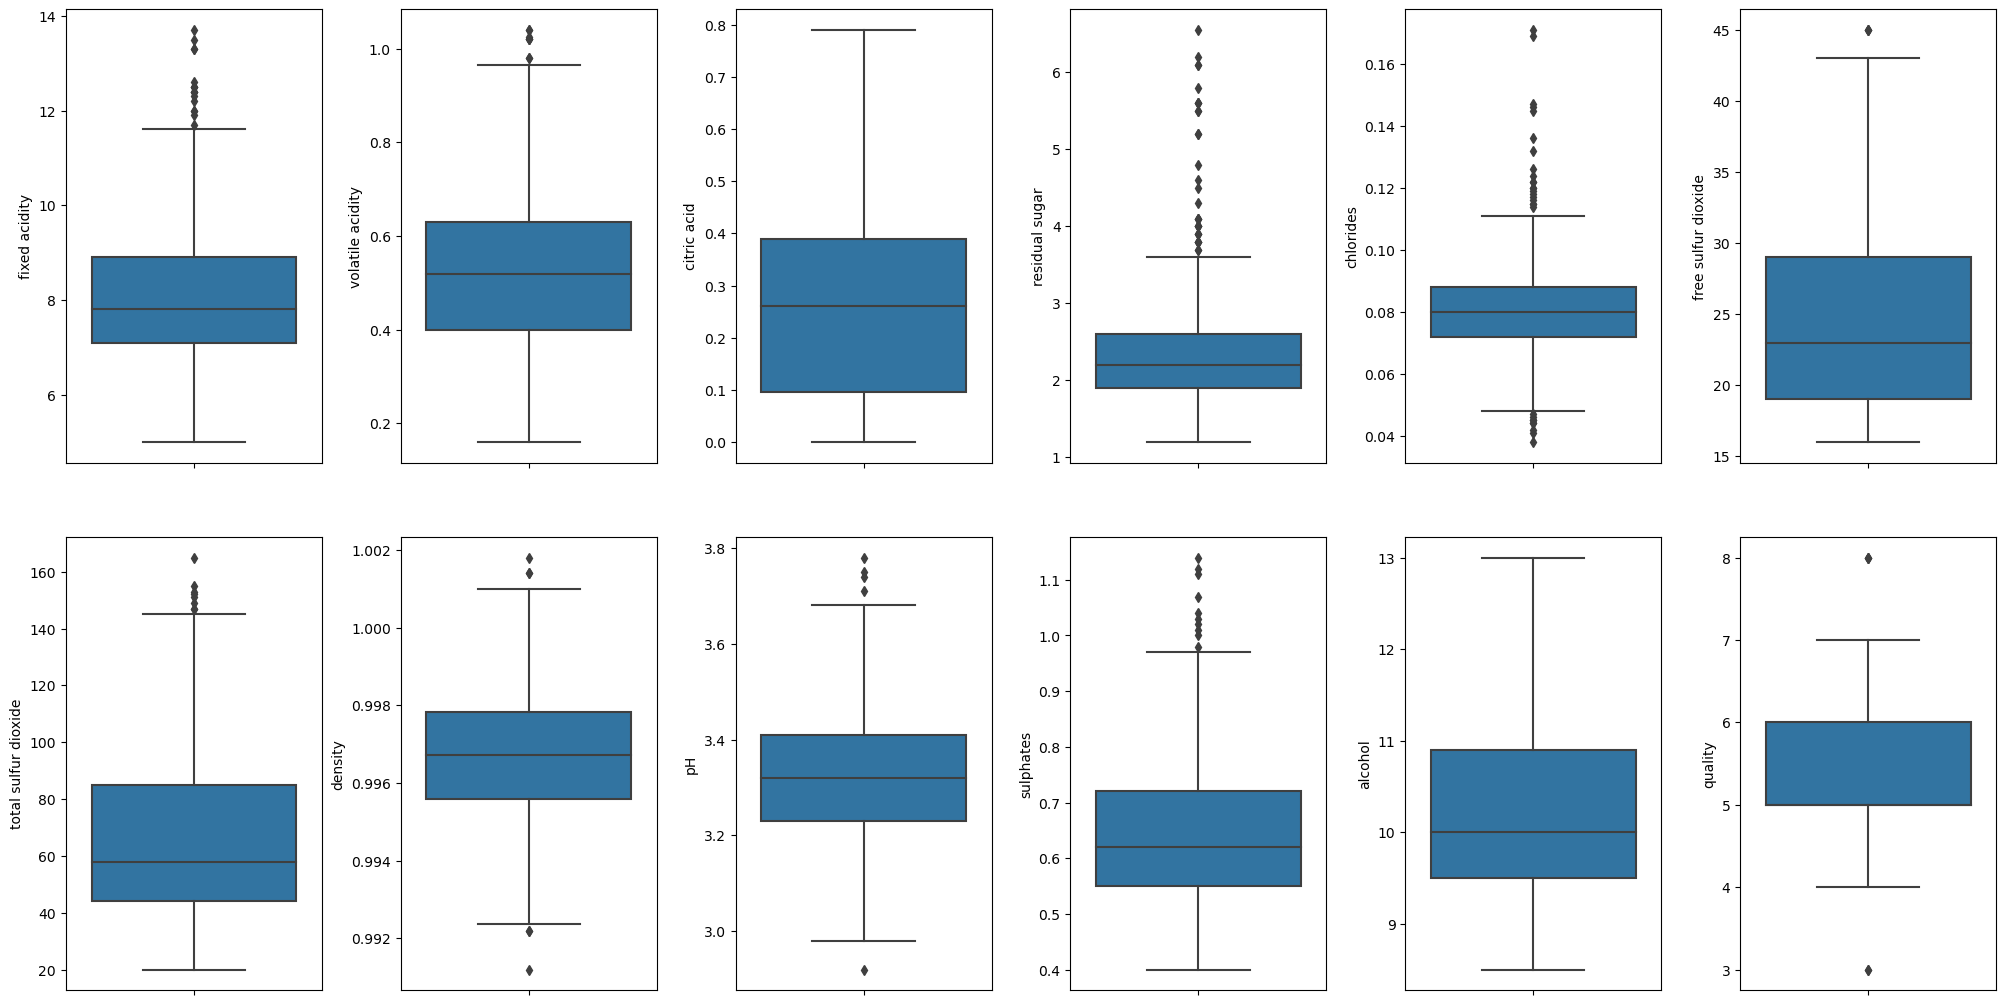

In [14]:
# create box plot
fig, ax = plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for i,j in df.items():
    sns.boxplot(y=i,data=df,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [15]:
df["quality"].value_counts()

5    239
6    205
7     42
4     12
8      3
3      2
Name: quality, dtype: int64

In [16]:
from pandas_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file="Output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
#log transformation
df["fixed acidity"]= np.log(1+df["fixed acidity"])
df["residual sugar"]= np.log(1+df["residual sugar"])
df["chlorides"]= np.log(1+df["chlorides"])
df["free sulfur dioxide"]= np.log(1+df["free sulfur dioxide"])
df["total sulfur dioxide"]= np.log(1+df["total sulfur dioxide"])
df["alcohol"]= np.log(1+df["alcohol"])

<AxesSubplot:>

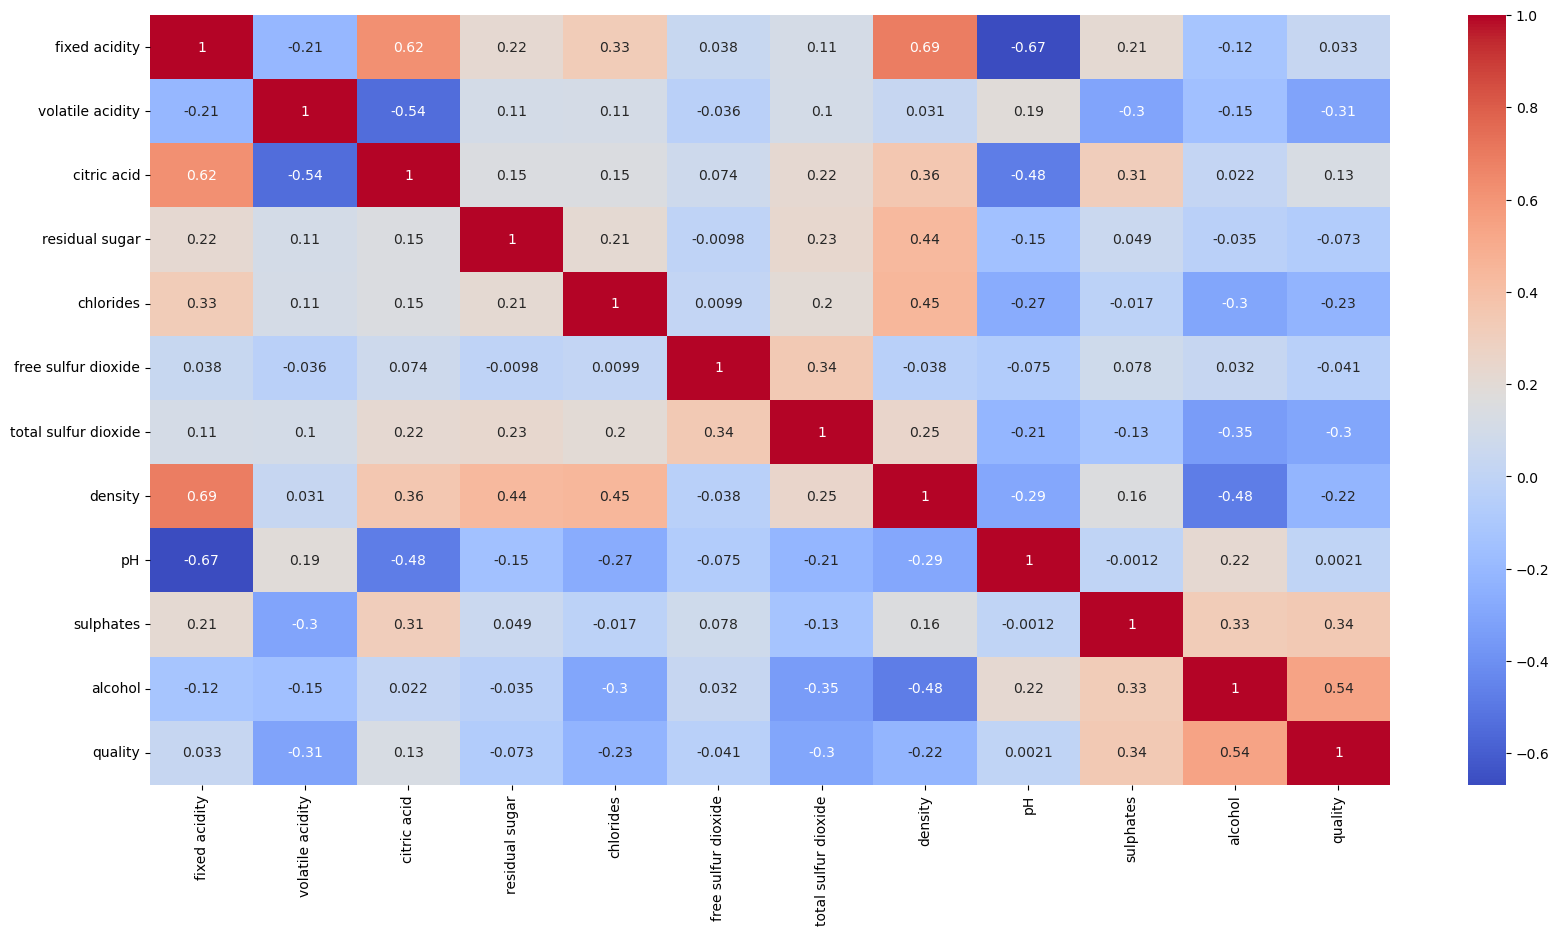

In [18]:
corr =df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [19]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

#### train test split

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=7,stratify=df["quality"])

In [21]:
from sklearn import metrics
LG=LogisticRegression()
ovrl=OneVsRestClassifier(LG).fit(x_train,y_train)
y_pred=ovrl.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.64      0.82      0.72        72
           6       0.61      0.59      0.60        61
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         1

    accuracy                           0.63       151
   macro avg       0.25      0.28      0.26       151
weighted avg       0.55      0.63      0.59       151



In [22]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
ovrk=OneVsRestClassifier(knn).fit(x_train,y_train)
y_pred=ovrk.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.61      0.64      0.62        72
           6       0.45      0.48      0.46        61
           7       0.30      0.23      0.26        13
           8       0.00      0.00      0.00         1

    accuracy                           0.52       151
   macro avg       0.27      0.27      0.27       151
weighted avg       0.49      0.52      0.50       151



In [23]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
GN=GaussianNB()
ovrg=OneVsRestClassifier(GN).fit(x_train,y_train)
y_pred=ovrg.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.75      0.78      0.76        72
           6       0.63      0.74      0.68        61
           7       0.50      0.15      0.24        13
           8       0.00      0.00      0.00         1

    accuracy                           0.68       151
   macro avg       0.38      0.33      0.34       151
weighted avg       0.66      0.68      0.66       151



##### Here the dataset is multiclass imbalanced so we check weighted f1 score

In [28]:
ovrg.predict(np.array([[6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5]]))

array([8], dtype=int64)

In [26]:
import pickle
pickle.dump(ovrg,open("quality.pkl","wb"))